In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Function of Erosion Operation

In [16]:
def erosion(image, struct_element):
    eroted_image = image.copy()
    height, width = image.shape
    struct_element = struct_element * 255
    offset = struct_element.shape[0] // 2

    for r in range(height):
        for c in range(width):
            fit = True
            for x in range(-offset, offset+1):
                for y in range(-offset, offset+1):
                    sr = x+offset
                    sc = y+offset
                    if(r+x >= 0 and r+x < height and c+y >= 0 and c+y < width):
                        if(struct_element[sr,sc] and image[r+x, c+y] != struct_element[sr,sc]):
                            fit  = False
                    elif(struct_element[sr,sc]):
                        fit = False
            
            eroted_image[r,c] = 255 if fit else 0
    

    return np.uint8(eroted_image)                    

# Function for Dilation

In [17]:
def dilation(image,struct_element):
    dilated_image = image.copy()
    height, width = image.shape
    struct_element = struct_element * 255
    offset = struct_element.shape[0] // 2

    for r in range(height):
        for c in range(width):
            hit = False
            for x in range(-offset, offset+1):
                for y in range(-offset, offset+1):
                    sr = x+offset
                    sc = y+offset
                    if (r+x >= 0 and r+x < height and c+y>=0 and c+y < width):
                        if(image[r+x, c+y] and struct_element[sr,sc] == struct_element[sr,sc]):
                            hit = True
            dilated_image[r,c] = 255 if hit else 0
    
    return np.uint8(dilated_image)

# Create Structuring Element

In [18]:
struct_element_size = 3
struct_element = np.ones((struct_element_size,struct_element_size))

# Load Image

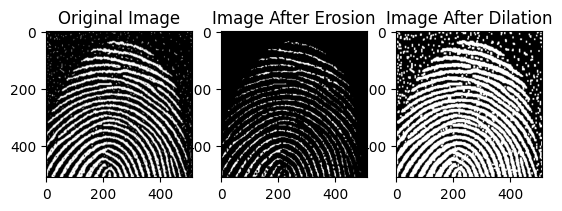

In [27]:
image = cv2.imread('Noisy_Fingerprint.tif',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512,512))

eroted_image = erosion(image, struct_element)
dilated_image = dilation(image, struct_element)

plt.Figure(figsize=(14,10))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(eroted_image, cmap='gray')
plt.title('Image After Erosion')

plt.subplot(1,3,3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Image After Dilation')

plt.show()